In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
df['filepath'] = '/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/' + df['patient_id'].astype(str) + '/' + df['image_id'].astype(str) + '.png'
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,filepath
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/462822612.png
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1459541791.png
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1864590858.png
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1874946579.png
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10011/220375232.png


In [5]:
df.iloc[0,-1]

'/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/462822612.png'

In [6]:
df = df[['filepath', 'cancer']]
df.head()

,filepath,cancer
0,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/462822612.png,0
1,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1459541791.png,0
2,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1864590858.png,0
3,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10006/1874946579.png,0
4,/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/10011/220375232.png,0


In [7]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [8]:
#!pip install -qU python-gdcm pydicom pylibjpeg

In [9]:
db = DataBlock(blocks=(ImageBlock(), CategoryBlock),
                   get_x=lambda x:x[0],
                   get_y=lambda x:x[1],
                   splitter  = RandomSplitter())

dls = db.dataloaders(df.values, num_workers=0)

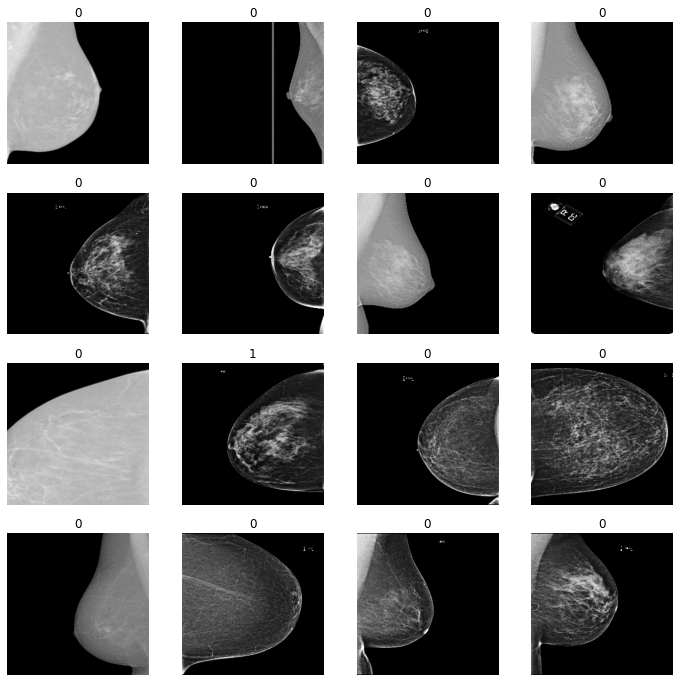

In [10]:
#dls = db.dataloaders(df.values)
dls.show_batch(max_n=16)

In [11]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [12]:
#learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [13]:
#learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [14]:
#learn.lr_find()

In [15]:
#learn.fit_one_cycle(1)

In [16]:
#learn.save('xresnet50_save', with_opt=False)

In [17]:
learn.load('xresnet50_save')

/opt/conda/lib/python3.7/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [18]:
temp = learn.predict('/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_dicomsdl_256/train_images_processed_cv2_dicomsdl_256/10006/1459541791.png')
temp[0]

'0'

In [19]:
dls.valid_ds

(#10941) [(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0))...]

In [20]:
test_csv = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/test.csv')

In [21]:
test_csv.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [22]:
image_dir_dicomsdl = '/kaggle/working/png_file_dic/'

os.makedirs(image_dir_dicomsdl, exist_ok=True)

#IMAGES_TO_PROCESS = 500

In [23]:
test_images = glob.glob("/kaggle/input/rsna-breast-cancer-detection/test_images/*/*.dcm")
len(test_images)

4

In [24]:
test_images[0]

'/kaggle/input/rsna-breast-cancer-detection/test_images/10008/736471439.dcm'

In [25]:
def process(f, size=256, save_folder=None, extension="png"):
    
    patient = f.split('/')[-2]
    image_name = f.split('/')[-1][:-4]
    
    dicom = dicoml.open(f)
    img = dicom.pixelData()

    img = (img - img.min()) / (img.max() - img.min())

    if dicom.getPixelDataInfo()['PhotometricInterpretation'] == "MONOCHROME1":
        img = 1 - img

    image = (img * 255).astype(np.uint8)
    
    img = cv2.resize(image, (size, size))

    file_name = f'{save_folder}' + f"{patient}_{image_name}.{extension}"

    cv2.imwrite(file_name, img)

In [31]:
import dicomsdl as dicoml
import cv2
import pydicom

from joblib import Parallel, delayed
import glob
import time
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm

In [32]:
Parallel(n_jobs=4)(
    delayed(process)(f, size = 256, save_folder = image_dir_dicomsdl)
    for f in test_images
)

[None, None, None, None]

In [34]:
prediction_ids = []
preds = []

for _, row in test_csv.iterrows():
    prediction_ids.append(row.prediction_id)
    pred_image_path = image_dir_dicomsdl + str(row.patient_id) + '_' + str(row.image_id) + '.png'
    pred = learn.predict(pred_image_path)[0]
    preds.append(pred)

submission = pd.DataFrame(data={'prediction_id': prediction_ids, 'cancer': preds}).groupby('prediction_id').max().reset_index()
submission.head()

,prediction_id,cancer
0,10008_L,0
1,10008_R,0
